# Power of Linear Models

In [20]:
import numpy as np
import pandas as pd

import sys 
sys.path.append('../')
import utils

In [21]:
# Randomly Generate Data
n_points = 2000

age = np.round(np.linspace(18,60,n_points),2) #age of employee
np.random.shuffle(age) 

performance = np.linspace(-10,10,n_points) #performance score of employee
np.random.shuffle(performance) 

noise = np.random.randn(n_points) 

g = (100*age) +200*(performance) + 500*age/performance -10000 + 500*noise
y = [1 if y>=0 else 0 for y in g] 

data = pd.DataFrame(data={'age':age,'performance':performance,'y':y})

print(sum(y))
data.head()

471


,age,performance,y
0,48.13,-2.696348,0
1,22.87,2.386193,0
2,52.18,-4.797399,0
3,47.94,-9.469735,0
4,36.41,-1.795898,0


In [22]:
#data.to_csv('../../data/performance.csv')
data = pd.read_csv('../../data/performance.csv', index_col=0)
print(len(data))
data.head()

2000


,age,performance,y
0,35.38,-0.325163,0
1,25.14,-0.785393,0
2,59.71,-9.699850,0
3,57.04,1.275638,1
4,45.06,-4.947474,0


Saving figure LM0_data


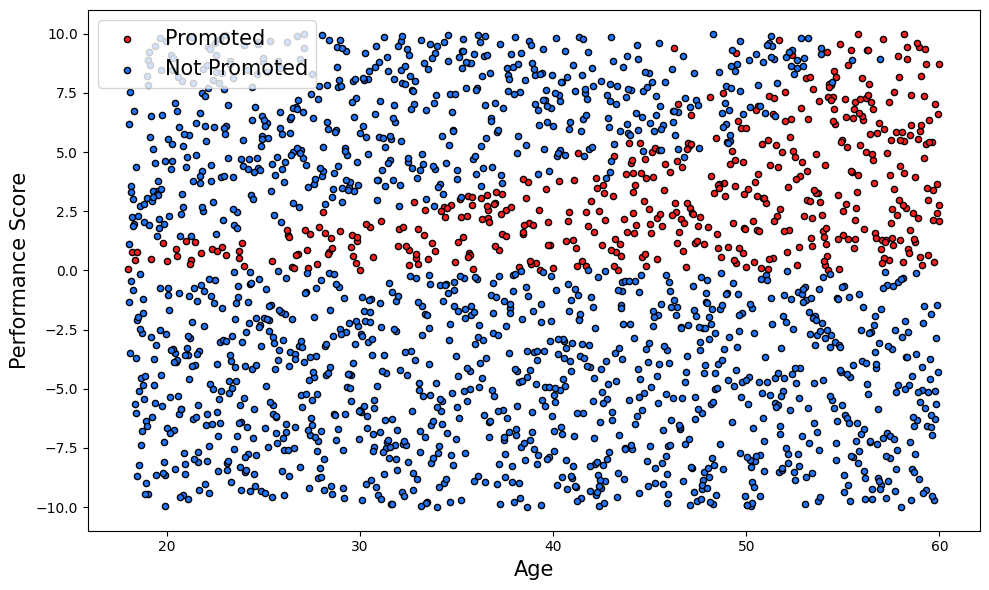

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(nrows=1, ncols=1,figsize=(10,6))

plt.scatter('age','performance',c='#ff2121',s=20,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=20,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=15)
plt.xlabel('Age',size=15)
plt.yticks(size=10)
plt.xticks(size=10)
plt.legend(['Promoted','Not Promoted'],loc =2,prop={"size":15})

utils.save_fig("LM0_data")

## Logistic Regression

In [24]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metric
import statsmodels.api as sm

x = data[['age','performance']]
x = sm.add_constant(x)
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 101)

model = sm.Logit(y_train,x_train).fit() #fit logistic regression model

predictions = np.around(model.predict(x_test)) 
accuracy = metric.accuracy_score(y_test,predictions)

print(round(accuracy*100,2))
model.summary()

Optimization terminated successfully.
         Current function value: 0.430221
         Iterations 7
81.83


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1397
Method:                           MLE   Df Model:                            2
Date:                Wed, 16 Oct 2024   Pseudo R-squ.:                  0.2170
Time:                        14:54:14   Log-Likelihood:                -602.31
converged:                       True   LL-Null:                       -769.20
Covariance Type:            nonrobust   LLR p-value:                 3.320e-73
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.9696      0.318    -15.637      0.000      -5.592      -4.347
age             0.0857      0.007     12.567      0.000       0.072       0.099
performance     0.1604      0.014     11.428      0.000       0.133       0.188
===============================================================================
"""

Saving figure LM0_LR1


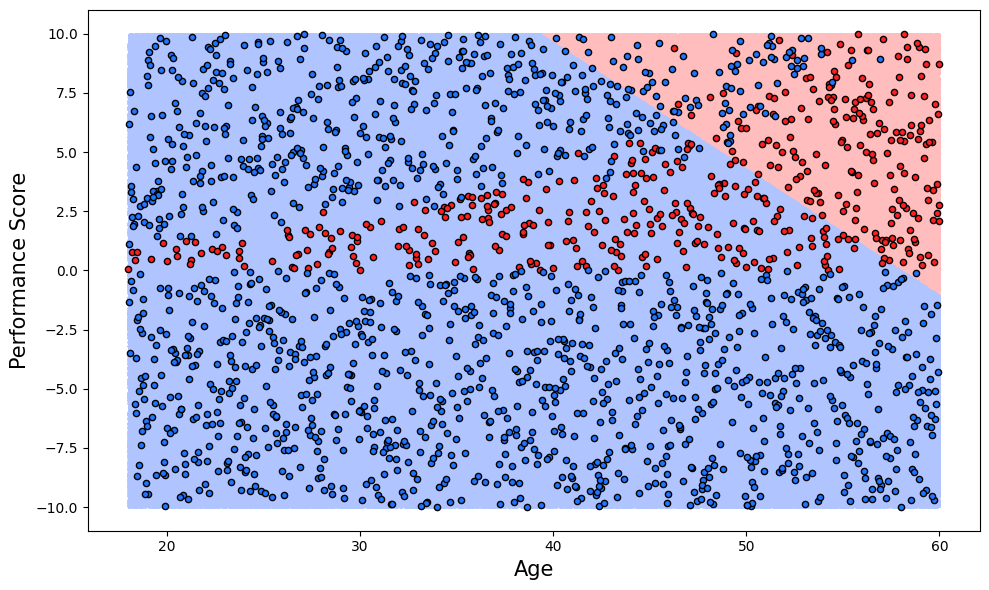

In [25]:
n_points = 1000000 #use many point to visualise decision boundry

age_db = np.linspace(18,60,n_points)
np.random.shuffle(age_db)

performance_db= np.linspace(-10,10,n_points)
np.random.shuffle(performance_db)

data_db = pd.DataFrame({'age':age_db,'performance':performance_db})
data_db = sm.add_constant(data_db)

#make predictions on the decision boundry points
predictions = model.predict(data_db)
y_db = [round(p) for p in predictions] 
data_db['y'] = y_db

plt.subplots(nrows=1, ncols=1,figsize=(10,6))

#Plot decision boundry
plt.scatter('age','performance',c='#ffbdbd',s=1,data=data_db[data_db.y == 1])
plt.scatter('age','performance',c='#b0c4ff',s=1,data=data_db[data_db.y == 0])

#Plot employee data points 
plt.scatter('age','performance',c='#ff2121',s=20,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=20,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=15)
plt.xlabel('Age',size=15)
plt.yticks(size=10)
plt.xticks(size=10)

utils.save_fig("LM0_LR1")

### Add transformations and interactions

In [26]:
data['age_perf_ratio'] = data['age']/data['performance']

x = data[['age','performance','age_perf_ratio']]
x = sm.add_constant(x)
y = data['y']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=98)

model = sm.Logit(y_train,x_train).fit() #fit new logistic regression model

predictions = np.around(model.predict(x_test))
accuracy = metric.accuracy_score(y_test,predictions)

print(round(accuracy*100,2))
model.summary()

Optimization terminated successfully.
         Current function value: 0.059453
         Iterations 16
98.67


/mnt/e/Github/XAI-tutorial/.venv/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/mnt/e/Github/XAI-tutorial/.venv/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1396
Method:                           MLE   Df Model:                            3
Date:                Wed, 16 Oct 2024   Pseudo R-squ.:                  0.8910
Time:                        14:54:18   Log-Likelihood:                -83.234
converged:                       True   LL-Null:                       -763.35
Covariance Type:            nonrobust   LLR p-value:                1.259e-294
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -28.6828      4.250     -6.748      0.000     -37.014     -20.352
age                0.3427      0.054      6.350      0.000       0.237       0.448
performance        0.1676      0.313      0.535      0.592      -0.446       0.781
age_perf_ratio     1.4067      0.265      5.307      0.000       0.887       1.926
==================================================================================

Possibly complete quasi-separation: A fraction 0.73 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

/mnt/e/Github/XAI-tutorial/.venv/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Saving figure LM0_LR2


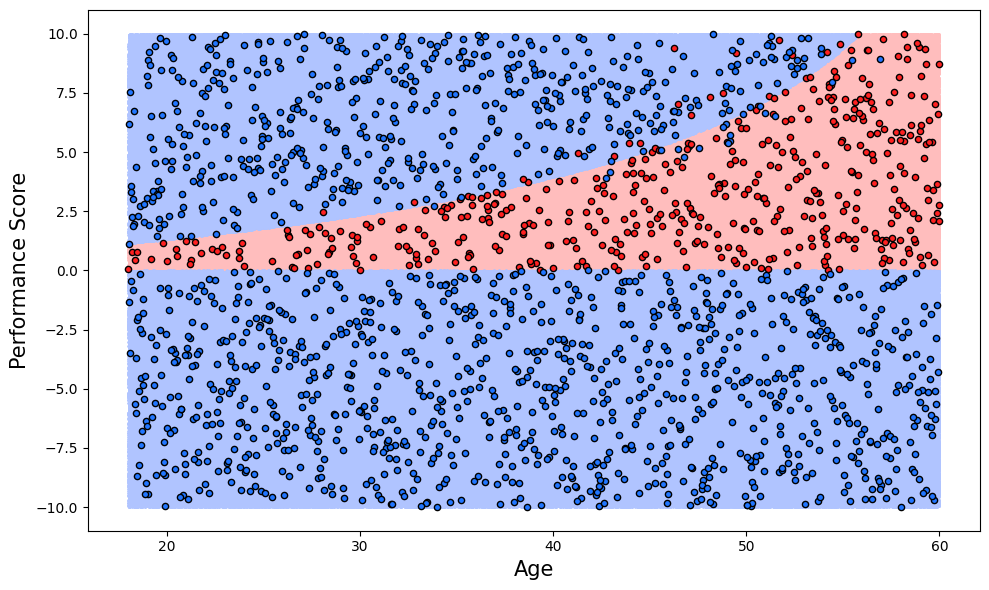

In [27]:
#Update decision boundry points
data_db.drop('y',axis=1,inplace=True)
data_db['age_perf_ratio'] = data_db['age']/data_db['performance']
sm.add_constant(data_db)

#make predictions on the decision boundry points
predictions = model.predict(data_db)
y_db = [round(p) for p in predictions] 
data_db['y'] = y_db

plt.subplots(nrows=1, ncols=1,figsize=(10,6))

#Plot decision boundry
plt.scatter('age','performance',c='#ffbdbd',s=1,data=data_db[data_db.y == 1])
plt.scatter('age','performance',c='#b0c4ff',s=1,data=data_db[data_db.y == 0])

#Plot employee data points 
plt.scatter('age','performance',c='#ff2121',s=20,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=20,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=15)
plt.xlabel('Age',size=15)
plt.yticks(size=10)
plt.xticks(size=10)

utils.save_fig("LM0_LR2")

## ANN Classifier


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Assuming 'data' is a pandas DataFrame containing the required columns

# Split the data into features and target
x = data[['age', 'performance']].values
y = data['y'].values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

# Convert the NumPy arrays to PyTorch tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Assuming y is a column vector
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)  # Assuming y is a column vector

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(2, 20)
        self.layer2 = nn.Linear(20, 15)
        self.layer3 = nn.Linear(15, 1)
        self.activation = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

# Instantiate the model, define loss function, and optimizer
model = NeuralNetwork()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Training the model
epochs = 100
batch_size = 10
for epoch in range(epochs):
    for i in range(0, len(x_train), batch_size):
        batch_x = x_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

# Evaluate the model on the test set
with torch.no_grad():
    test_outputs = model(x_test)
    predicted_labels = (test_outputs >= 0.5).float()
    accuracy = (predicted_labels == y_test).float().mean().item()

print(round(accuracy * 100, 2))


96.33


Saving figure LM0_CNN


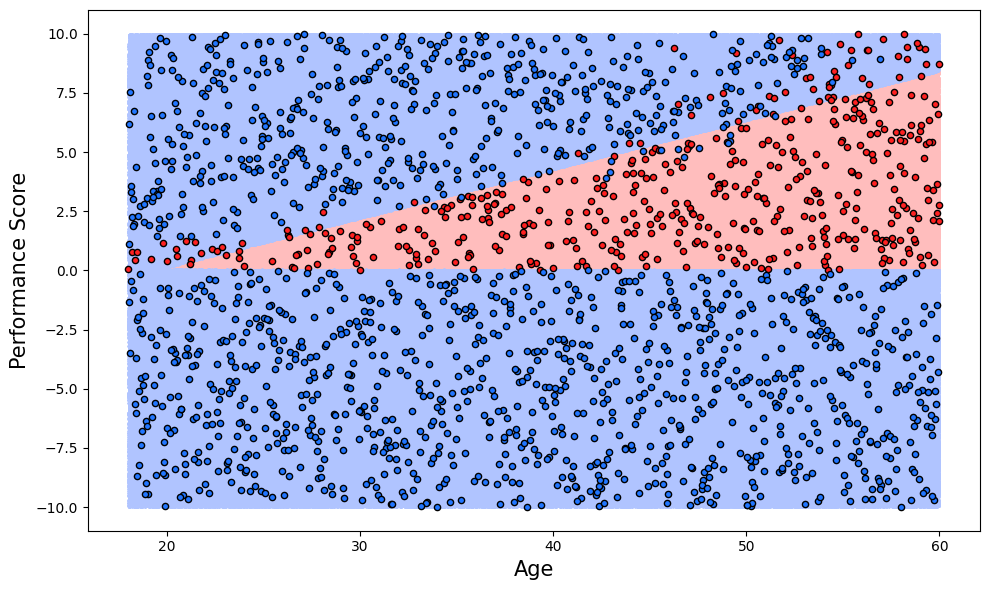

In [29]:
with torch.no_grad():
    model.eval()
    data_db_tensor = torch.tensor(data_db[['age', 'performance']].values, dtype=torch.float32)
    predictions = model(data_db_tensor).numpy()

y_db = np.around(predictions)
data_db['y'] = y_db

plt.subplots(nrows=1, ncols=1,figsize=(10,6))

# Plot decision boundary
plt.scatter('age', 'performance', c='#ffbdbd', s=1, data=data_db[data_db.y == 1])
plt.scatter('age', 'performance', c='#b0c4ff', s=1, data=data_db[data_db.y == 0])

# Plot employee data points
plt.scatter('age','performance',c='#ff2121',s=20,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=20,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=15)
plt.xlabel('Age',size=15)
plt.yticks(size=10)
plt.xticks(size=10)


utils.save_fig("LM0_CNN")